In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import os
import datetime
import pandas as pd
import timeit

In [2]:
'''Micol'''
path_raw = '/Users/micol/Documents/Imperial/Year4/Master_Project/Measurements_after_realignment' #path with raw spectra files

'''Rachel'''
#path_raw = 'D:/raw_spectra' #path containing all raw spectra
#path_log = 'D:/MSci_Full' #path containing full_log

full_log = '2018-11-28-20181128102247.log' #contains temperature and status of h/c BB target

In [3]:
all_the_files = np.array([i for i in os.listdir(path_raw) if os.path.isfile(os.path.join(path_raw,i)) and i.startswith('IC_raw_spectra_')]) #all files in directory starting with 'IC_raw_spectra'

def read_temperatures_check(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    temp1 = [float(b) for b in (lines[1].split())[6:]]
    tempHBB1 = temp1[0]
    return tempHBB1

delete_files = [f for f in all_the_files if read_temperatures_check(path_raw,f)==0.0] #files where there is no temperature measurement
file_array = [f.strip('IC_raw_spectra.tx') for f in all_the_files if f not in delete_files] #numbers of allowed file lists, in wrong order
file_integers = sorted([int(i) for i in file_array]) #number converted to sorted integers (not naturally done)

files_list = ['IC_raw_spectra_'+str(num)+'.txt' for num in file_integers] #final file list in order

In [4]:
"""retrieving times from files"""

def read_times(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    times = lines[0].split() #retrieve times of beginning of all spectra in a file
    return times

In [5]:
all_times_list = [] #final time list [374x4] (in HH:MM:SS.microsec format)

for f in range(len(files_list)): #go through files_list and extract times
    all_times_list.append(read_times(path_raw, files_list[f]))

flat_list = [item for sublist in all_times_list for item in sublist] #1D list of all times (in HH:MM:SS.microsec format)

spectrum_times = [] #final time list [(374*4)x1] in seconds from midnight format

for i in flat_list: #convert times to seconds format
    time = datetime.datetime.strptime(i, '%H:%M:%S.%f')
    spectrum_times.append((time.microsecond)/1000000 +time.second+time.minute*60+time.hour*3600)

Code up to this point returns:

$\textbf{spectrum_times}$: a list of times of all spectra for which the temperature is not zero

$\textbf{files_list}$: a list of all raw files for which temperature is not zero

In [6]:
time_col_name = 'Time' # name the time column in all subsequent dataframes

In [7]:
def read_file(directory, filename, separator, head='infer'):
    """
    Reads an external file and outputs it as a Pandas Dataframe
    Input: Directory, Filename (Strings)
    Output: Pandas Dataframe
    """
    path=os.path.join(directory, filename)
    dataset = pd.read_csv(path, header = head, sep=separator)
    
    return dataset

In [8]:
# LOG FILE
# Importing file X with features Y Z
x = read_file(path_raw, full_log, separator=',', head=None)

y = x[[1,6,8,9,10,11]] # picking out relevant features

zz = y.loc[y[11] != 0] # removing zero-valued entries in column 11, the ones where it wasnt looking at hot or cold BB

log_file = zz.reset_index()

log_file.columns = ['a','Real Time', 'room_temp', 'hbb_temp','cbb_temp','Time','orientation'] #all the column names; 'f' is some value (0,225,270)
log_file['hc'] = np.nan #add empty column 'hc'
#log_file['temp_avg'] = np.nan #add empty column 'temp_avg'

log_file.loc[log_file['orientation'] == 270, 'hc'] = 'h' #if f=270, 'h'
log_file.loc[log_file['orientation'] == 225, 'hc'] = 'c'
#zz2.loc[zz2['hc'] == 'h', 'temp_avg'] == zz2.loc['hbb_temp']

log_file.drop('a', axis=1, inplace=True)

#log_file.loc[100, 'orientation']

In [9]:
log_file[80:]

,Real Time,room_temp,hbb_temp,cbb_temp,Time,orientation,hc
80,11:46:14,21.58,69.82,27.75,42374,270,h
81,11:46:16,21.57,69.82,27.75,42376,270,h
82,11:46:18,21.58,69.82,27.71,42378,270,h
83,11:46:20,21.56,69.82,27.74,42380,270,h
84,11:46:22,21.56,69.82,27.75,42382,270,h
85,11:46:24,21.56,69.82,27.76,42384,270,h
86,11:46:26,21.55,69.82,27.74,42386,270,h
87,11:46:28,21.54,69.83,27.76,42388,270,h
88,11:46:30,21.55,69.83,27.77,42390,270,h
89,11:46:32,21.54,69.83,27.78,42392,270,h


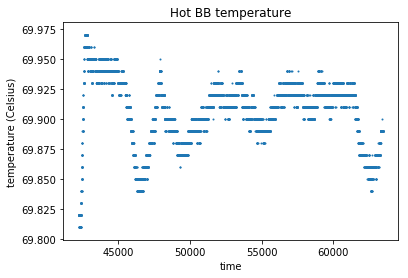

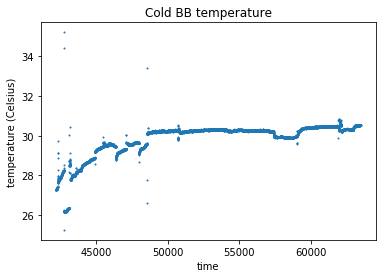

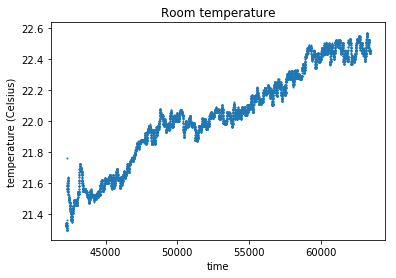

In [10]:
plt.scatter(log_file['Time'], log_file['hbb_temp'], s=1)
plt.title('Hot BB temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()
plt.scatter(log_file['Time'], log_file['cbb_temp'], s=1)
plt.title('Cold BB temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()
plt.scatter(log_file['Time'], log_file['room_temp'], s=1)
plt.title('Room temperature')
plt.xlabel('time')
plt.ylabel('temperature (Celsius)')
plt.show()

In [11]:
'''insert_row inserts a row into a dataframe after a given index and then reindex all rows in ascending order'''

def insert_row(i, df, line):
    dfA = df.iloc[:i, ]
    dfB = df.iloc[i:, ]
    df = dfA.append(line).append(dfB).reset_index(drop = True) # Our code differs here
    return df

In [12]:
times_all = [i for i in spectrum_times] # select times when reading is stable
print(times_all)
times = times_all[-4:0:-4] #only want every fourth spectrum
times.append(times_all[0])
times.sort(reverse = True) #need to insert rows into dataframe in reverse order in order not to get messed up with indices
print(times)

[41809.553, 41823.023, 41836.494, 41849.907, 42228.687, 42242.159, 42255.586, 42269.013, 42619.617, 42633.058, 42646.471, 42659.9, 42678.92, 42692.392, 42705.807, 42719.229, 42739.835, 42753.252, 42766.676, 42780.088, 42797.523, 42810.933, 42824.35, 42837.78, 42857.594, 42871.017, 42884.49, 42897.962, 42915.661, 42929.086, 42942.498999999996, 42955.972, 42974.201, 42987.621, 43001.046, 43014.519, 43033.541, 43046.952, 43060.425, 43073.836, 43092.065, 43105.538, 43119.012, 43132.486, 43151.506, 43164.925, 43178.344, 43191.761, 43209.991, 43223.415, 43236.838, 43250.275, 43269.296, 43282.724, 43296.152, 43309.567, 43327.796, 43341.218, 43354.652, 43368.125, 43385.562, 43398.987, 43412.461, 43425.934, 43444.163, 43457.58, 43471.054, 43484.527, 43503.549, 43516.963, 43530.437, 43543.854, 43848.106, 43861.58, 43875.054, 43888.485, 43907.508, 43920.983, 43934.412, 43947.847, 43967.662, 43981.137, 43994.563, 44007.985, 44027.342, 44040.759, 44054.234, 44067.709, 44087.525, 44101.0, 44114.474,

In [13]:
#scan log_times, and insert spectra at corresponding times, with 'Nan' in the h_c column (by default)
log_times = log_file['Time']

for t in times:
    i=0
    if t > log_times[0]:
        while log_file.at[i, time_col_name] <= t:
            i += 1   
        line = pd.DataFrame([t], columns = [time_col_name])
        log_file = insert_row(i, log_file, line)
    else:
        line = pd.DataFrame([t], columns = [time_col_name])
        log_file = insert_row(i, log_file, line)

In [14]:
log_file[28:]

,Real Time,Time,cbb_temp,hbb_temp,hc,orientation,room_temp
28,11:44:26,42266.0,27.34,69.82,h,270.0,21.32
29,11:44:28,42268.0,27.33,69.82,h,270.0,21.32
30,11:44:30,42270.0,27.32,69.82,h,270.0,21.31
31,11:44:32,42272.0,27.35,69.82,h,270.0,21.30
32,11:44:34,42274.0,27.34,69.82,h,270.0,21.31
33,11:44:36,42276.0,27.34,69.82,h,270.0,21.30
34,11:44:38,42278.0,27.34,69.82,h,270.0,21.30
35,11:44:40,42280.0,27.34,69.82,h,270.0,21.30
36,11:44:42,42282.0,27.37,69.82,h,270.0,21.30
37,11:44:44,42284.0,27.35,69.81,h,270.0,21.30


In [15]:
hc_list = []
temps_avg = []
temps_std = []

#find last spectrum
d = log_file.index[-1]
while log_file.at[d, 'hc'] == 'c' or log_file.at[d, 'hc'] == 'h':
    d -=1   

for i in range(d-1):
    value = log_file.at[i, 'hc']
    if value != 'c' and value != 'h':
        hot_or_cold = log_file.iloc[i+1]['hc']
        hc_list.append(hot_or_cold) # the spectra are assigned the h_c value of the following time
        temp_list = []
        a=2
        if hot_or_cold == 'h':
            num = log_file.iloc[i+1]['hbb_temp']
            while m.isnan(num) == False:
                temp_list.append(num)
                num = log_file.iloc[i+a]['hbb_temp']
                a += 1
            temps_avg.append(np.average(temp_list))
            temps_std.append(np.std(temp_list))
        elif hot_or_cold == 'c':
            num = log_file.iloc[i+1]['cbb_temp']
            while m.isnan(num) == False:
                temp_list.append(num)
                num = log_file.iloc[i+a]['cbb_temp']
                a += 1
            temps_avg.append(np.average(temp_list))
            temps_std.append(np.std(temp_list))

In [16]:
times.sort() # now they are back in ascending order

final_frame_4 = pd.DataFrame(
    {'Time': times[:-1],
     'h_or_c': hc_list,
     'temp_avg': temps_avg,
     'temp_std': temps_std
    })

final_frame_4[140:]

,Time,h_or_c,temp_avg,temp_std
140,51060.786,c,30.191034,1.373263e-02
141,51120.495,c,30.199286,2.103205e-02
142,51179.012,h,69.902069,4.827586e-03
143,51237.008,h,69.908889,3.142697e-03
144,51295.710,c,30.215517,1.521936e-02
145,51353.518,c,30.227241,1.573412e-02
146,51413.647,h,69.918214,5.380900e-03
147,51471.510,h,69.917143,4.517540e-03
148,51530.062,c,30.250357,1.546474e-02
149,51587.871,c,30.254667,1.627541e-02


In [17]:
h = 6.626e-34
c = 3.0e+8
k = 1.381e-23

planck_a = 2*h*(c**2)
planck_e = h*c/k

def planck(wavenumber, T): # T in Kelvin, wavenumber in cm^-1
    radiance = 100*planck_a*((wavenumber*100)**3)/(np.exp(planck_e*(wavenumber*100)/T)-1)
    return radiance #returns radiance in $W m^{-2} sr^{-1} (cm^{-1})^{-1}$

In [18]:
def read_wavenumbers(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list
    wns = []
    for i in lines[5:]:
        line = i.split()
        split_lines = [float(a) for a in line]
        wns.append(split_lines[0])
    return wns

raw_wavenumbers = read_wavenumbers(path_raw, files_list[0]) #all wavenumbers are the same in all files so just need to read from the first file
wavenums = raw_wavenumbers

In [19]:
def read_all_raw_spectra(directory, filename):
    lines = open(os.path.join(directory, filename)).readlines() #finds all lines in file as string elements in "lines" list

    sp1 = []
    sp2 = []
    sp3 = []
    sp4 = []
    
    for i in lines[5:]:
        line = i.split()
        split_lines = [float(a) for a in line]
        sp1.append(split_lines[1])
        sp2.append(split_lines[2])
        sp3.append(split_lines[3])
        sp4.append(split_lines[4])
    avg_4_spec = 0.25*(np.array(sp1) + np.array(sp2) + np.array(sp3) + np.array(sp4))
    
    return avg_4_spec #list of raw value as function of wavenumber averaged over the 4 spectra

average_all_4_spectra = [read_all_raw_spectra(path_raw, files_list[f]) for f in range(len(files_list)-1)] #list of 352 elements, which is a list of 8000 points averaged over the 4 spectra
average_4_spectra = average_all_4_spectra

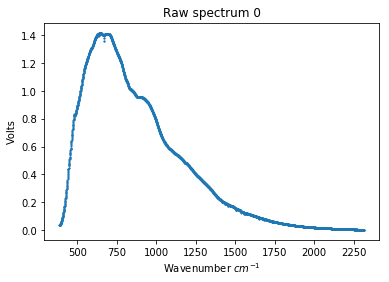

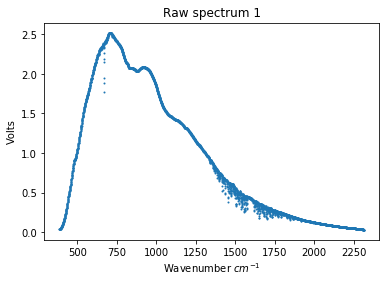

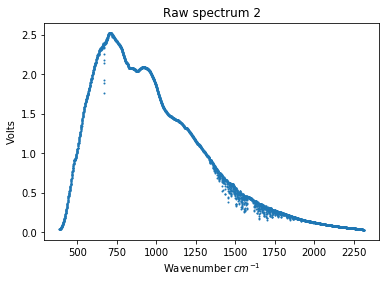

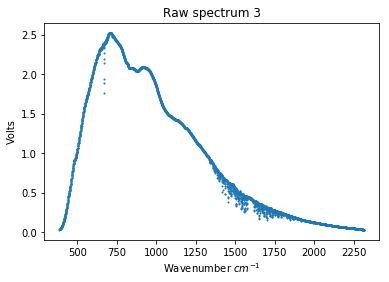

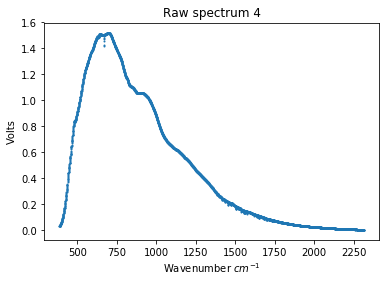

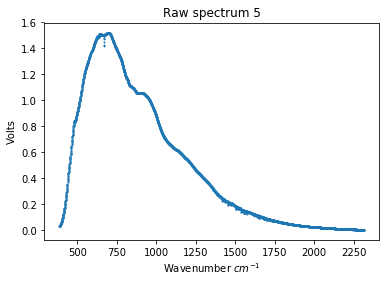

In [20]:
# Plot a raw spectrum
def raw_spectrum_plot(num): #num = the spectrum you want to plot (0 to 272)
    plt.scatter(wavenums, average_4_spectra[num], s=1)
    plt.title('Raw spectrum ' + str(num))
    plt.xlabel('Wavenumber $cm^{-1}$')
    plt.ylabel('Volts')
    plt.show()

raw_spectrum_plot(0)
raw_spectrum_plot(1)
raw_spectrum_plot(2)
raw_spectrum_plot(3)
raw_spectrum_plot(4)
raw_spectrum_plot(5)


In [21]:
def response_fn(spectrum_number): #returns the response function at some time and wavenumber
    
    (a,b) = (average_4_spectra[spectrum_number], average_4_spectra[spectrum_number + 1])
    if a[1000] < b[1000]:
        V_c = a
        V_h = b
    else:
        V_c = b
        V_h = a
    print(V_c[1000])
    print(V_h[1000])
    V_diff = np.array(V_h)-np.array(V_c)
    
    (e,f) = (final_frame_4.at[spectrum_number,'temp_avg'], final_frame_4.at[spectrum_number+1,'temp_avg'])
    if e<f:
        temp_average_c = e
        temp_average_h = f
    else:
        temp_average_c = f
        temp_average_h = e
    print(temp_average_c)
    print(temp_average_h)
    radiances_avg_h = [planck(wn, temp_average_h+273.15) for wn in wavenums]
    radiances_avg_c = [planck(wn, temp_average_c+273.15) for wn in wavenums]
    rad_diff = np.array(radiances_avg_h) - np.array(radiances_avg_c)
    
    def division(raw_val,planck_val):
        if planck_val == 0:
            div = 0
        else:
            div = raw_val/planck_val
        return div
    
    division_vec = np.vectorize(division)
    ratio = division_vec(V_diff, rad_diff)
    
    return(ratio)

In [22]:
indices = np.arange(3, final_frame_4.index[-1], 2) #array of every other (odd) index, starting at n=13, cold
#NOTE this has to be changed for each different data set
all_resp_functions = [response_fn(i) for i in indices]  #list of arrays of response functions available to plot, list length=175, array lengths=4001

diff_resp_functions = [i - all_resp_functions[-1] for i in np.array(all_resp_functions)]


1.0705499945
2.0501749515
27.365
69.962
1.0693750085
2.04719996475
26.159
69.9492857143
1.07194998875
2.0479499695
26.2842857143
69.9517241379
1.07350000725
2.05004996075
26.3217857143
69.9357142857
1.01972500975
2.07434993975
27.805862069
69.9427586207
1.083649993
2.068000078
27.9128571429
69.9496296296
1.0837500095
2.06619995825
27.9748275862
69.9424137931
1.082924992
2.06035000075
28.1706432749
69.9475
1.082575023
2.05844998375
28.4224137931
69.9433333333
1.08374997975
2.05717504025
28.4976666667
69.9403571429
1.0837250055
2.057224989
28.5903448276
69.9437931034
1.08517497775
2.05540001375
28.62
69.94
1.0839999915
2.0548249485
28.6886666667
69.9403448276
1.083825022
2.0494999885
28.7289285714
69.9314285714
1.08347499375
2.050599992
28.8124137931
69.9334482759
1.0846000015
2.04969996225
28.8337931034
69.9413793103
1.083375007
2.04729998125
29.2096428571
69.9439285714
1.08305001275
2.046399951
29.255
69.9289285714
1.08390000475
2.04242503625
29.34
69.9259259259
1.08134999875
2.0433999

In [25]:
print(len(wavenums))
print(len(times[140:180:2]))

print(len(all_resp_functions[70:90]))
print(len(all_resp_functions[70:90][0]))

4001
20
20
4001


Note more dark vertical lines compared to regular window... polypropylene absorption lines?

In [27]:
# cut times: [4700:6600]
grid = plt.GridSpec(1, 7, wspace=0)

fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(grid[0,:5])
p = ax1.pcolor(wavenums, times[:-2:2], all_resp_functions)
plt.title('Response function Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)')
plt.xlabel('Wavenumber $cm^{-1}$')
plt.ylabel('Time (s)')
cbaxes = fig.add_axes([0, 0.1, 0.01, .8]) 
cb = fig.colorbar(p, cax = cbaxes)

ax2 = fig.add_subplot(grid[0,5:6], sharey = ax1)
ax2.plot(log_file['cbb_temp'], log_file['Time'], 'b')
plt.grid()
plt.xlabel('Cold BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

ax3 = fig.add_subplot(grid[0,6:7], sharey = ax1)
ax3.plot(log_file['hbb_temp'], log_file['Time'], 'r')
plt.grid()
plt.xlabel('Hot BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

# zoom into later times
ax4 = fig.add_subplot(grid[1,:5])
plot_diff = ax4.pcolor(wavenums, times[140:180:2], all_resp_functions[70:90])
plt.title('Difference in response function compared to final time Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)')
plt.xlabel('Wavenumber $cm^{-1}$')
plt.ylabel('Time (s)')
cbaxes1 = fig.add_axes([0, 0.55, 0.01, .3]) 
cb = fig.colorbar(plot_diff, cax = cbaxes1)

ax5 = fig.add_subplot(grid[1,5:6], sharey = ax2)
ax5.plot(log_file['cbb_temp'][4700:6600], log_file['Time'][4700:6600], 'b')
plt.grid()
plt.xlabel('Cold BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

ax6 = fig.add_subplot(grid[1,6:7], sharey = ax2)
ax6.plot(log_file['hbb_temp'][4700:6600], log_file['Time'][4700:6600], 'r')
plt.grid()
plt.xlabel('Hot BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

plt.show()

IndexError: index out of range

Note last couple of measurements are with polypropylene window

Lots of new absorption features due to new window

In [ ]:
grid = plt.GridSpec(1, 7, wspace=0)

fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(grid[0,:5])
p = ax1.pcolor(wavenums, times[:-2:2], diff_resp_functions)
plt.title('Response function difference compared to last one Volts/($W m^{-2} sr^{-1} (cm^{-1})^{-1}$)')
plt.xlabel('Wavenumber $cm^{-1}$')
plt.ylabel('Time (s)')
cbaxes = fig.add_axes([0, 0.1, 0.01, .8]) 
cb = fig.colorbar(p, cax = cbaxes)

ax2 = fig.add_subplot(grid[0,5:6], sharey = ax1)
ax2.plot(log_file['cbb_temp'], log_file['Time'], 'b')
plt.grid()
plt.xlabel('Cold BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

ax3 = fig.add_subplot(grid[0,6:7], sharey = ax1)
ax3.plot(log_file['hbb_temp'], log_file['Time'], 'r')
plt.grid()
plt.xlabel('Hot BB temp ($\degree$C)')
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,        
    labelleft=False)

plt.show()

Dark horizontal line corresponds to dip in temperature of hot BB